In [2]:
import os
os.environ[ "TF_CPP_MIN_LOG_LEVEL"] = "3"
import io
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity( tf.compat.v1.logging.ERROR)
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
imdb_plaintext, info_plaintext = tfds.load( "imdb_reviews", with_info=True, as_supervised=True)

info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})

In [4]:
for example in imdb_plaintext[ "train"].take( 2):
	print( example[ 0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [5]:
imdb_subwords, info_subwords = tfds.load( "imdb_reviews/subwords8k", with_info=True, as_supervised=True)

info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [6]:
for example in imdb_subwords[ "train"].take( 2):
	print( example[ 0].numpy())

[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975]
[  12   31   93  867    7 1256 6585 7961  421  365    2   26   14    9
  988 1089    7    4 6728    6  276 5760 2587    2   81 6118 8029    2
  139 1892 7961    5 5402  246

In [7]:
tokenizer_subwords = info_subwords.features[ "text"].encoder

for example in imdb_subwords[ "train"].take( 2):
	print( tokenizer_subwords.decode( example[ 0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [8]:
train_data = imdb_plaintext[ "train"]

training_sentences = []

for s, _ in train_data:
	training_sentences.append( s.numpy().decode( "utf8"))

In [9]:
vocab_size = 10000
oov_tok = "<OOV>"

tokenizer_plaintext = Tokenizer( num_words=vocab_size, oov_token=oov_tok)

tokenizer_plaintext.fit_on_texts( training_sentences)

sequences = tokenizer_plaintext.texts_to_sequences( training_sentences)

In [10]:
tokenizer_plaintext.sequences_to_texts( sequences[ 0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [11]:
len( tokenizer_plaintext.word_index)

88583

In [12]:
print( tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [13]:
tokenized_string = tokenizer_subwords.encode( training_sentences[ 0])

print( tokenized_string)

original_string = tokenizer_subwords.decode( tokenized_string)

print( original_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

In [14]:
sample_string = "Tensorflow, from basics to mastery"

tokenized_string = tokenizer_plaintext.texts_to_sequences( [ sample_string])
print( f"Tokenized string is { tokenized_string}")

original_string = tokenizer_plaintext.sequences_to_texts( tokenized_string)
print( f"The original string: { original_string}")

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


In [15]:
tokenized_string = tokenizer_subwords.encode( sample_string)
print( f"Tokenized string is { tokenized_string}")

original_string = tokenizer_subwords.decode( tokenized_string)
print( f"The original string: { original_string}")

Tokenized string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: Tensorflow, from basics to mastery


In [16]:
for ts in tokenized_string:
	print( f"{ ts} ---> { tokenizer_subwords.decode( [ ts])}")

6307 ---> Ten
2327 ---> sor
2934 ---> flow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data, test_data = imdb_subwords[ "train"], imdb_subwords[ "test"]

train_dataset = train_data.shuffle( BUFFER_SIZE)

train_dataset = train_dataset.padded_batch( BATCH_SIZE)
test_dataset = test_data.padded_batch( BATCH_SIZE)

In [18]:
embedding_dim = 64

model = tf.keras.Sequential( [
	tf.keras.layers.Embedding( tokenizer_subwords.vocab_size, embedding_dim),
	tf.keras.layers.GlobalAveragePooling1D(),
	tf.keras.layers.Dense( 6, activation="relu"),
	tf.keras.layers.Dense( 1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524237 (2.00 MB)
Trainable params: 524237 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
num_epochs = 10

model.compile(
	loss="binary_crossentropy",
	optimizer="adam",
	metrics=[ "accuracy"]
)

history = model.fit(
	train_dataset,
	epochs=num_epochs,
	validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 12s 24ms/step - loss: 0.6735 - accuracy: 0.6269 - val_loss: 0.6256 - val_accuracy: 0.6656
Epoch 2/10
391/391 [==============================] - 9s 23ms/step - loss: 0.5055 - accuracy: 0.8138 - val_loss: 0.4312 - val_accuracy: 0.8465
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 0.3564 - accuracy: 0.8762 - val_loss: 0.3532 - val_accuracy: 0.8671
Epoch 4/10
391/391 [==============================] - 9s 22ms/step - loss: 0.2903 - accuracy: 0.8975 - val_loss: 0.3305 - val_accuracy: 0.8670
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 0.2529 - accuracy: 0.9090 - val_loss: 0.3119 - val_accuracy: 0.8778
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 0.2259 - accuracy: 0.9202 - val_loss: 0.3057 - val_accuracy: 0.8818
Epoch 7/10
391/391 [==============================] - 9s 22ms/step - loss: 0.2089 - accuracy: 0.9263 - val_loss: 0.3046 - val_accuracy: 0.881

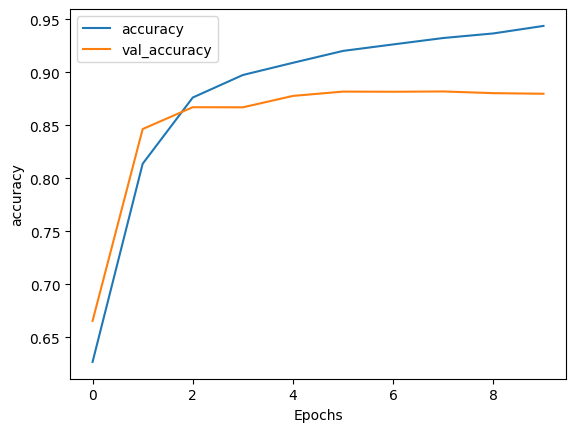

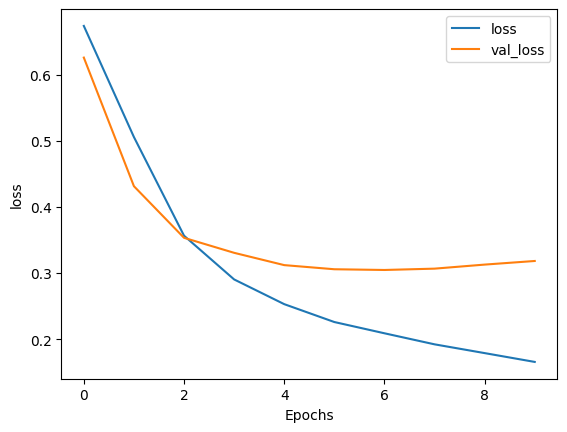

In [20]:
def plot_graphs( history, string):
	plt.plot( history.history[ string], label=string)
	plt.plot( history.history[ f"val_{ string}"], label=f"val_{ string}")
	plt.xlabel( "Epochs")
	plt.ylabel( string)
	plt.legend()
	plt.show()

plot_graphs( history, "accuracy")
plot_graphs( history, "loss")